In [1]:
# Data Manipulation
import numpy as np
import pandas as pd

#impoting other useful libraries
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime as dt
from matplotlib.dates import DateFormatter
import scipy.stats
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline


In [2]:
accepted_file = "C:/Users/ASUS/Downloads/accepted_2007_to_2018Q4.csv.gz"
rejected_file = "C:/Users/ASUS/Downloads/rejected_2007_to_2018Q4.csv.gz"

In [30]:
accepted = pd.read_csv(accepted_file)
rejected = pd.read_csv(rejected_file)

C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
accepted.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
rejected.head()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0.0


In [31]:
#Checking number of rows and columns
print(accepted.shape)
print(rejected.shape)

(2260701, 151)
(27648741, 9)


In [32]:
#Checking the null values in the dataframe
accepted.isnull().values.sum()

108486249

In [33]:
#Checking for null values in every column
acc_na_check = accepted.isnull().sum(axis = 0).sort_values(ascending = False)
acc_na_check

member_id                                     2260701
orig_projected_additional_accrued_interest    2252050
hardship_end_date                             2249784
hardship_start_date                           2249784
hardship_type                                 2249784
                                               ...   
policy_code                                        33
revol_bal                                          33
fico_range_high                                    33
fico_range_low                                     33
id                                                  0
Length: 151, dtype: int64

In [38]:
#Checking the columns with more than 90% null values 
accepted_null_90 = accepted.columns[accepted.isnull().mean() > 0.9]
len(accepted_null_90)

#Dropping the columns with more than 90% null values
accepted_drop = accepted.columns[accepted.isnull().mean() > 0.9]
df_accepted = accepted.drop(accepted_drop,axis=1)
df_accepted.isnull().values.sum()

24749228

In [140]:
#Even after drooping columns with more than 90% null values, there are significant amount of null values to be dropped.
#Hence I would be doing the feature selection where I'll be considering the columns that is required for analysis

df_accepted = df_accepted[["loan_amnt", "term", "int_rate", "installment", "grade", 
                           "home_ownership", "annual_inc", "verification_status", "issue_d", "loan_status",
           "purpose",  "earliest_cr_line", "open_acc", "pub_rec", "revol_bal", "revol_util",
           "total_acc", "initial_list_status", "application_type",  "pub_rec_bankruptcies"]]

In [57]:
df_accepted.isna().sum()

loan_amnt                  11
term                       11
int_rate                   11
installment                11
grade                      11
home_ownership             11
annual_inc                 12
verification_status        11
issue_d                    11
loan_status                11
purpose                    11
earliest_cr_line           16
open_acc                   16
pub_rec                    16
revol_bal                  11
revol_util                444
total_acc                  16
initial_list_status        11
application_type           11
mort_acc                12405
pub_rec_bankruptcies      315
dtype: int64

In [62]:
#removing the columns filled with more than 50% Nan values
df_accepted.isnull().sum()/len(df_accepted)
nanfil = []
for i in df_accepted.columns:
    if df_accepted[i].isnull().sum()/len(df_accepted) > 0.5:
        nanfil.append(i)

df_accepted = df_accepted.drop(nanfil, axis = 1)
df_accepted.isna().sum()

loan_amnt                  11
term                       11
int_rate                   11
installment                11
grade                      11
home_ownership             11
annual_inc                 12
verification_status        11
issue_d                    11
loan_status                11
purpose                    11
earliest_cr_line           16
open_acc                   16
pub_rec                    16
revol_bal                  11
revol_util                444
total_acc                  16
initial_list_status        11
application_type           11
mort_acc                12405
pub_rec_bankruptcies      315
dtype: int64

In [65]:
#Checking the unique values for mort_acc column
df_accepted['mort_acc'].unique()

array([ 0.,  4.,  1.,  6.,  3.,  2., 10.,  5., nan,  8.,  7.,  9., 14.,
       12., 11., 16., 15., 17., 13., 22., 19., 23., 18., 29., 20., 51.,
       25., 24., 34., 27., 46., 37., 21., 26.])

<AxesSubplot:ylabel='Frequency'>

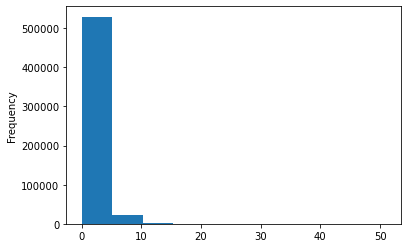

In [66]:
df_accepted['mort_acc'].plot.hist()

In [68]:
df_accepted['mort_acc'].median()

1.0

In [69]:
df_accepted['revol_util'].median()

50.3

In [72]:
df_accepted['revol_util'].unique()

array([ 57.8 ,  42.6 ,  50.9 , ..., 114.2 ,  12.42, 110.4 ])

<AxesSubplot:ylabel='Frequency'>

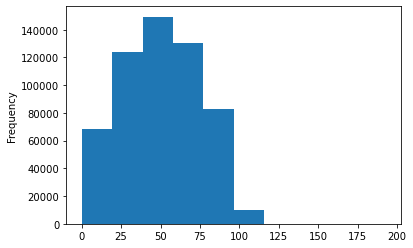

In [73]:
df_accepted['revol_util'].plot.hist()

In [74]:
df_accepted['revol_util'].mean()

50.367759056965895

In [83]:
#Replacing the columns with Na values with mean and median
df_accepted['mort_acc'].fillna(df_accepted['mort_acc'].mean(), inplace=True)
df_accepted['revol_util'].fillna(df_accepted['revol_util'].median(), inplace=True)

In [88]:
#Dropping the columns with more than 10% Na values 
drop_cols = df_accepted.columns[df_accepted.isnull().mean() > 0.2]
df_accepted = df_accepted.drop(drop_cols,axis=1)

In [90]:
#Checking the null values in the rejected dataframe
rejected.isnull().values.sum()

19451521

In [92]:
#Checking for null values in every column
rej_na_check = rejected.isnull().sum(axis = 0).sort_values(ascending = False)
rej_na_check

Risk_Score              18497630
Employment Length         951355
Loan Title                  1303
Policy Code                  918
Zip Code                     293
State                         22
Amount Requested               0
Application Date               0
Debt-To-Income Ratio           0
dtype: int64

In [98]:
#Checking the columns with more than 90% null values 
rejected_null_90 = rejected.columns[rejected.isnull().mean() > 0.5]
len(rejected_null_90)

#Dropping the columns with more than 90% null values
rejected_drop = rejected.columns[rejected.isnull().mean() > 0.5]
df_rejected = rejected.drop(rejected_drop,axis=1)
df_rejected.isnull().sum(axis = 0).sort_values(ascending = False)

Employment Length       951355
Loan Title                1303
Policy Code                918
Zip Code                   293
State                       22
Amount Requested             0
Application Date             0
Debt-To-Income Ratio         0
dtype: int64

In [120]:
#Even after drooping columns with more than 90% null values, there are significant amount of null values to be dropped.
#Hence I would be doing the feature selection where I'll be considering the columns that is required for analysis

df_rejected = df_rejected[["Amount Requested", "Loan Title", "Debt-To-Income Ratio"]]
df_rejected.isnull().sum(axis = 0).sort_values(ascending = False)

Loan Title              1303
Amount Requested           0
Debt-To-Income Ratio       0
dtype: int64

In [121]:
len(df_rejected['Loan Title'].unique())

73928

In [122]:
# The dataframe has same column names hence renaming it to same name
df_rejected.rename(columns={'debt_consolidation': 'Debt consolidation'}, inplace=True)

In [123]:
df_rejected['Loan Title'].value_counts()

Debt consolidation                         12313227
Other                                       2656222
Credit card refinancing                     2298199
other                                       2042528
credit_card                                 1363406
                                             ...   
Help me get out of this mess                      1
help with wedding expens                          1
investing education for mobile dynamics           1
HSBC refinance loan                               1
Business Advertising Loan                         1
Name: Loan Title, Length: 73927, dtype: int64

In [124]:
df_rejected.loc[df_rejected['Loan Title']=='debt_consolidation','Loan Title'] = 'Debt consolidation'

In [125]:
df_rejected['Loan Title'].value_counts()

Debt consolidation                         12313227
Other                                       2656222
Credit card refinancing                     2298199
other                                       2042528
credit_card                                 1363406
                                             ...   
Help me get out of this mess                      1
help with wedding expens                          1
investing education for mobile dynamics           1
HSBC refinance loan                               1
Business Advertising Loan                         1
Name: Loan Title, Length: 73927, dtype: int64

In [126]:
#Replacing the null values with mode
df_rejected.fillna(df_rejected['Loan Title'].mode(), inplace=True)

# EXPLORATORY DATA ANALYSIS

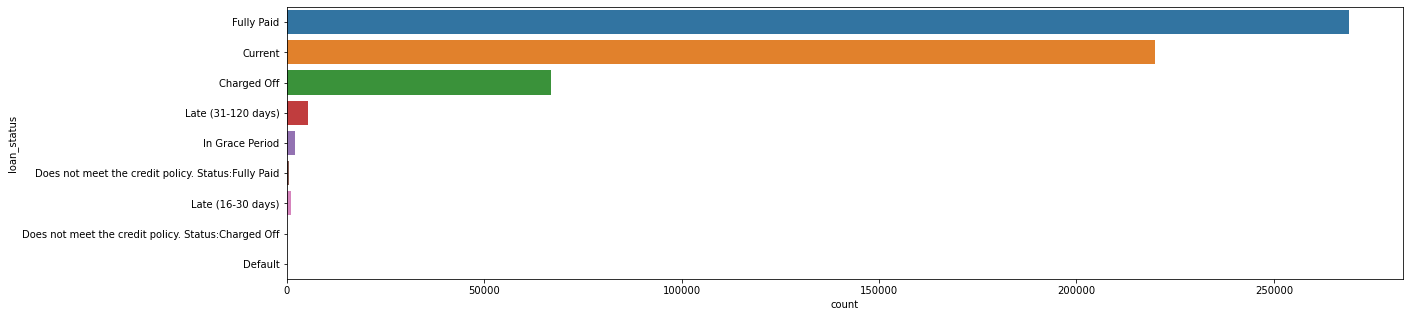

In [128]:
#Plots the count of account based on their loan status
fig = plt.figure(figsize=(20,5))
sns.countplot(y='loan_status', data=df_accepted);

Fully paid are the highest followed by current and the charged off. Most of the loan accounts are either paid off or the payment is still in progress

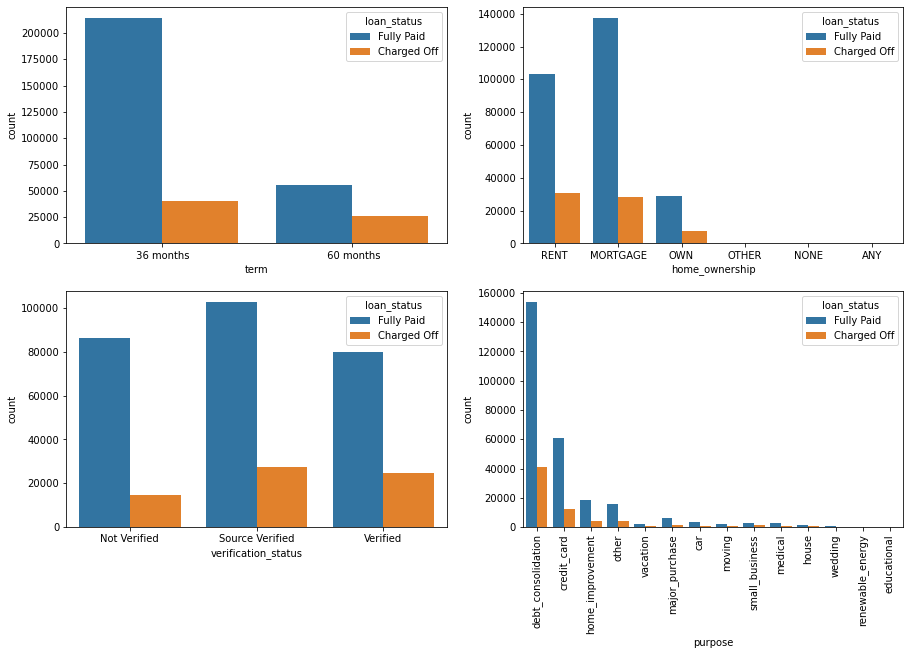

In [133]:
paid_charged = df_accepted.loc[(df_accepted["loan_status"] == "Fully Paid") | (df_accepted["loan_status"] == "Charged Off")]

plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.countplot(x='term', data=paid_charged, hue='loan_status')

plt.subplot(4, 2, 2)
sns.countplot(x='home_ownership', data=paid_charged, hue='loan_status')

plt.subplot(4, 2, 3)
sns.countplot(x='verification_status', data=paid_charged, hue='loan_status')

plt.subplot(4, 2, 4)
g = sns.countplot(x='purpose', data=paid_charged, hue='loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

Plot 1: Loan is fully paid in 36 months term
Plot 2: Loan is fully paid with mortgage ownership and charged for own house
Plot 3: Clients who fully paid are source verified and one that is not verified is charged off
Plot 4: Loan is charged off significantly for debt consolidation

<AxesSubplot:>

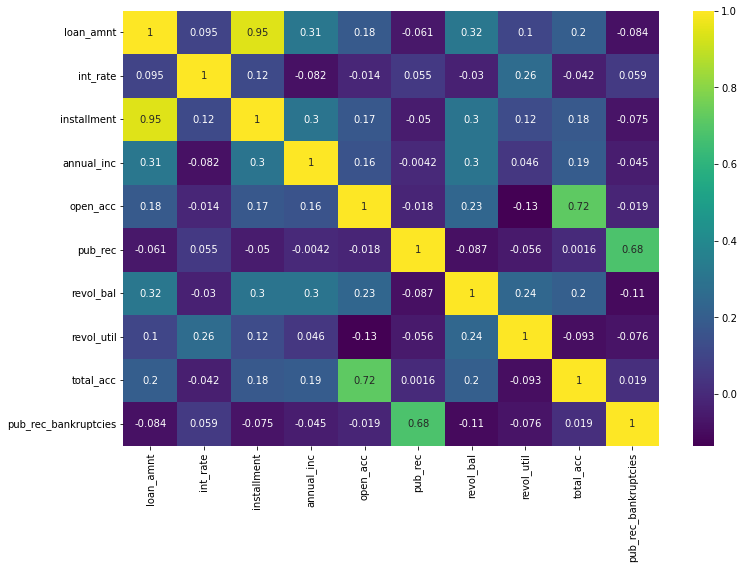

In [153]:
#Plotting correlation matrix
fig= plt.figure(figsize=(12, 8))
sns.heatmap(df_accepted.corr(), annot=True, cmap='viridis')

1. Installment and loan amount are heavily correlated, which implies greater the loan amount, higher the installments and vice versa.
2. total_acc and open_acc are correlated
3. publci_rec_bankruptcies and public_rec are correlated

<AxesSubplot:xlabel='grade', ylabel='count'>

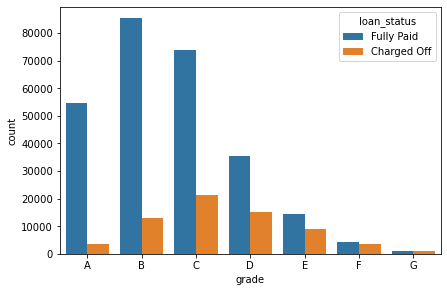

In [156]:
paid_charged = df_accepted.loc[(df_accepted["loan_status"] == "Fully Paid") | (df_accepted["loan_status"] == "Charged Off")]

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(paid_charged.grade.unique().tolist())
sns.countplot(x='grade', data=paid_charged, hue='loan_status', order=grade)


As grade goes higher the count of charged off increases. 
There is a higher risk in allocating loan to candidates with a higher grade.
Grade C onwards has higher loan fully paid to charged off ratio.

<AxesSubplot:xlabel='application_type', ylabel='count'>

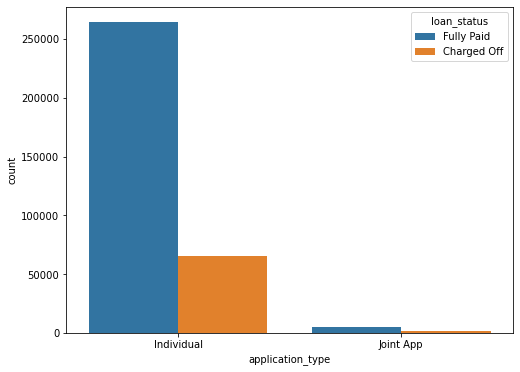

In [157]:
plt.figure(figsize=(8, 6))
sns.countplot(x="application_type", data=paid_charged, hue="loan_status")

Individual applicant type have paid loan completely 

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loan_amnt', ylabel='Density'>

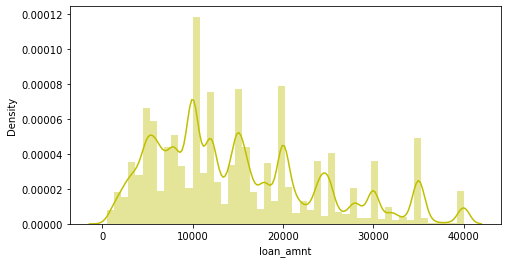

In [159]:
plt.figure(1, figsize=(17, 4))
plt.subplot(1, 2, 1)
sns.distplot(df_accepted["loan_amnt"], color="y")

Thevariables are similarly distributed, which shows that there is an adequate balance in the loan amount.